In [1]:
import pandas as pd

customer_offers = pd.read_csv('customer_offers.csv')
customer_offers = customer_offers.set_index('customer_name')

In [2]:
from sklearn import cluster

model = cluster.KMeans(n_clusters=3, random_state=10)
cluster = model.fit_predict(customer_offers)
offer_cols = customer_offers.columns
customer_offers['cluster'] = cluster

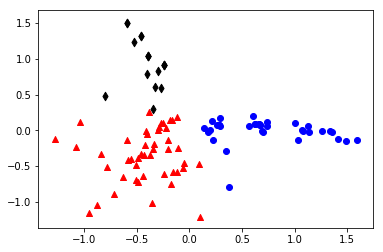

In [3]:
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

pca = decomposition.PCA(n_components=2)
customer_offers['pc1'], customer_offers['pc2'] = zip(*pca.fit_transform(customer_offers[offer_cols]))

colors = ['r', 'b', 'k', 'g']
markers = ['^', 'o', 'd', 's']

for c in customer_offers['cluster'].unique():
    d = customer_offers[customer_offers['cluster'] == c]
    plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])

plt.show()

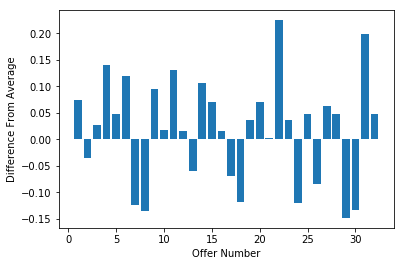

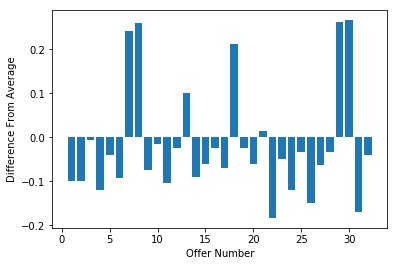

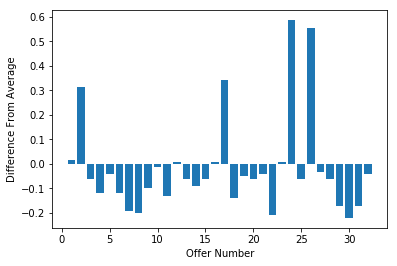

In [4]:
total_proportions = customer_offers[offer_cols].mean()
for i in range(3):
    plt.figure(i)
    cluster_df = customer_offers[customer_offers['cluster'] == i]
    cluster_proportions = cluster_df[offer_cols].mean()

    diff = cluster_proportions - total_proportions
    plt.bar(range(1, 33), diff)
    plt.xlabel('Offer Number')
    plt.ylabel('Difference From Average')
plt.show()

In [5]:
offer_info = pd.read_csv('offer_info.csv')
for i in range(3):
    cluster_df = customer_offers[customer_offers['cluster'] == i]
    cluster_proportions = cluster_df[offer_cols].mean()

    diff = cluster_proportions - total_proportions
    cluster_rep_offers = list(diff.sort_values(ascending=False).index.astype(int)[0:5])
    print(offer_info.loc[offer_info['offer_id'].isin(cluster_rep_offers),'varietal'])

3     Champagne
5      Prosecco
10    Champagne
21    Champagne
30    Champagne
Name: varietal, dtype: object
6         Prosecco
7        Espumante
17       Espumante
28    Pinot Grigio
29          Malbec
Name: varietal, dtype: object
0         Malbec
1     Pinot Noir
16    Pinot Noir
23    Pinot Noir
25    Pinot Noir
Name: varietal, dtype: object
